[cdh1 한글 폰트 설치]

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,761 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and dire

[cdh2 파일 업로드]

In [2]:
from google.colab import files
# 파일 업로드 창을 띄우고, 선택된 파일을 업로드합니다.
uploaded = files.upload()

Saving 최종_cdh.csv to 최종_cdh.csv


[cdh3 송파구 부동산 5년 자료 파일 필터링 및 하나로 합치기]

In [ ]:
# 파일 리스트 올리기 (거래금액(만원) 열의 쉼표 제거, 필요한 데이터들만 추출하고 통합 + 계약년월 기준으로 정렬)
import pandas as pd
from google.colab import files  # 다운로드를 위한 모듈

# 파일 리스트
file_list = [
    "202112030_아파트(매매)_실거래가_2019_2020.csv",
    "202112030_아파트(매매)_실거래가_2020_2021.csv",
    "202112030_아파트(매매)_실거래가_2021_2022.csv",
    "202112030_아파트(매매)_실거래가_2022_2023.csv",
    "202112030_아파트(매매)_실거래가_2023_2024.csv",
]

# 데이터를 저장할 리스트
data_frames = []

# 데이터 처리
for file in file_list:
    try:
        # 파일 읽기 (utf-8로 시도)
        df = pd.read_csv(file, encoding="utf-8")
    except UnicodeDecodeError:
        # 오류 발생 시 euc-kr로 다시 시도
        df = pd.read_csv(file, encoding="euc-kr")

    # 필요한 열만 추출
    df = df[["NO", "시군구", "계약년월", "거래금액(만원)"]]
    # 거래금액에서 쉼표 제거
    df["거래금액(만원)"] = df["거래금액(만원)"].str.replace(",", "").astype(int)
    # 리스트에 추가
    data_frames.append(df)

# 데이터프레임 합치기
df_hap = pd.concat(data_frames, ignore_index=True)

# 계약년월로 정렬
df_hap = df_hap.sort_values(by="계약년월").reset_index(drop=True)

# NO 열을 1부터 다시 설정
df_hap["NO"] = range(1, len(df_hap) + 1)

# 파일 저장 (utf-8-sig 인코딩)
file_name = "202112030_아파트(매매)_통합.csv"
df_hap.to_csv(file_name, index=False, encoding="utf-8-sig")

# 파일 다운로드
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[cdh4 금값 csv파일의 첫 번째 열의 형식과 두 번째 열의 이름 바꾸기]

In [ ]:
import pandas as pd
from google.colab import files  # 파일 다운을 위한 import

# 파일 업로드 창을 띄우고, 선택된 파일을 업로드합니다.
uploaded = files.upload()

# CSV 파일 읽기
df = pd.read_csv('금값5년.csv')

# 날짜 변환 함수 정의
def convert_date_format(date_string):
    return pd.to_datetime(date_string, format='%a %b %d %Y').strftime('%Y%m')

# 첫 번째 열을 변환하여 업데이트
df['기간'] = df['기간'].apply(convert_date_format)

# 변환된 내용을 새로운 CSV 파일로 저장
output_filename = '금시세5년.csv'
df.to_csv(output_filename, index=False, encoding='utf-8-sig')  # utf-8-sig 인코딩 사용

# 저장한 파일 다운로드
files.download('금시세5년.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[cdh 4-2] 송파구 부동산과 금값의 정보 합치기 (최종_cdh.csv)

In [ ]:
import pandas as pd
from google.colab import files  # 파일 다운로드를 위한 import

# 데이터 불러오기
아파트_데이터 = pd.read_csv("202112030_아파트(매매)_통합.csv", encoding="utf-8-sig")
금시세_데이터 = pd.read_csv("금시세5년.csv", encoding="utf-8-sig")

# 데이터 병합
최종_데이터 = pd.concat([아파트_데이터, 금시세_데이터], axis=1)

# 결과 저장
output_filename = "최종_cdh.csv"
최종_데이터.to_csv(output_filename, index=False, encoding="utf-8-sig")  # utf-8-sig 인코딩 사용

# 저장된 파일 다운로드
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[cdh5] 주성분 분석을 하지 않은 부동산 데이터의 상관관계

=== 상관분석 결과 ===
피어슨 상관계수:
               계약년월  거래금액(만원)
계약년월      1.000000  0.239278
거래금액(만원)  0.239278  1.000000

스피어만 상관계수:
               계약년월  거래금액(만원)
계약년월      1.000000  0.246421
거래금액(만원)  0.246421  1.000000

켄달 상관계수:
               계약년월  거래금액(만원)
계약년월      1.000000  0.166682
거래금액(만원)  0.166682  1.000000


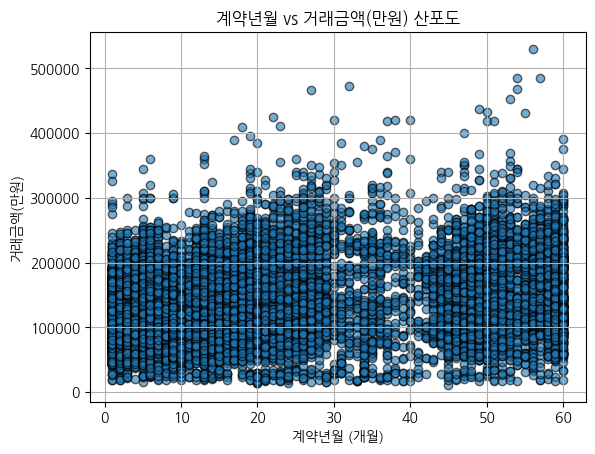

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("최종_cdh.csv", encoding="utf-8-sig")

# 필요한 열 추출
분석_데이터 = df[["계약년월", "거래금액(만원)"]].copy()

# '계약년월'을 기준 날짜로부터 경과 개월 수로 변환
기준_날짜 = pd.to_datetime("201905", format="%Y%m")
분석_데이터["계약년월"] = pd.to_datetime(분석_데이터["계약년월"], format="%Y%m")
분석_데이터["계약년월"] = 분석_데이터["계약년월"].map(lambda x: (x.year - 기준_날짜.year) * 12 + (x.month - 기준_날짜.month))
'''
부동산 매매가와 금 값의 날짜 열의 각 날짜를 기준 날짜(2016년 5월)로부터 경과된 전체 개월 수로 변환.
연도 차이를 12개월 단위로 계산하고, 월 차이를 더해 기준으로부터의 개월 수를 구함.
결과적으로, 날짜 데이터를 주성분 분석에 적합한 숫자형 데이터로 변환
'''

# 상관분석 수행
coef_p = 분석_데이터.corr(method="pearson") # 피어슨
coef_s = 분석_데이터.corr(method="spearman") # 스피어만
coef_k = 분석_데이터.corr(method="kendall") # 켄달

# 상관계수 출력
print("=== 상관분석 결과 ===")
print("피어슨 상관계수:\n", coef_p)
print("\n스피어만 상관계수:\n", coef_s)
print("\n켄달 상관계수:\n", coef_k)

# 산포도 그리기
plt.scatter(분석_데이터["계약년월"], 분석_데이터["거래금액(만원)"], alpha=0.6, edgecolor='k')
plt.title("계약년월 vs 거래금액(만원) 산포도")
plt.xlabel("계약년월 (개월)")
plt.ylabel("거래금액(만원)")
plt.grid(True)
plt.show()

[cdh5-2] 송파구 부동산 데이터의 계약기간과 거래금액의 상관관계를 분석하는 주성분분석




=== 제1주성분 분석 결과 ===
[-1.44 -0.6  -0.38 ...  2.48  1.79  1.09]

=== 제1주성분 설명력 ===
제1주성분의 설명력: 61.96%

=== 상관분석 결과 ===
피어슨 상관계수:
        제1주성분
제1주성분    1.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


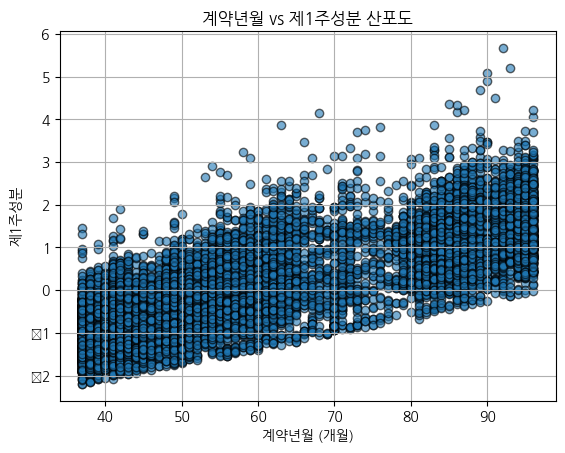

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 데이터 불러오기
df = pd.read_csv("최종_cdh.csv", encoding="utf-8-sig")

# 필요한 열 추출
데이터 = df[["계약년월", "거래금액(만원)"]].copy()

# '계약년월'을 기준 날짜로부터 경과 개월 수로 변환
기준_날짜 = pd.to_datetime("201605", format="%Y%m")  # 기준 날짜를 2016년 5월로 지정
데이터["계약년월"] = pd.to_datetime(데이터["계약년월"], format="%Y%m")
데이터["계약년월"] = 데이터["계약년월"].map(lambda x: (x.year - 기준_날짜.year) * 12 + (x.month - 기준_날짜.month))

# 데이터 스케일링
scaler = StandardScaler()
스케일링_데이터 = scaler.fit_transform(데이터)

# PCA 실행 (1개의 주성분으로 변환)
pca = PCA(n_components=1)
pca.fit(스케일링_데이터)
제1주성분 = pca.transform(스케일링_데이터)

# PCA 결과 출력
print("\n=== 제1주성분 분석 결과 ===")
print(np.round(제1주성분.flatten(), 2))  # 제1주성분 데이터를 1차원 배열로 변환하여 출력

# PCA 설명력 출력
설명력 = pca.explained_variance_ratio_
print("\n=== 제1주성분 설명력 ===")
print(f"제1주성분의 설명력: {설명력[0]:.2%}")

# 제1주성분 데이터프레임 생성
제1주성분_데이터프레임 = pd.DataFrame(제1주성분, columns=["제1주성분"])

# 상관분석 수행
coef_p = 제1주성분_데이터프레임.corr(method="pearson")  # 피어슨

# 상관계수 출력
print("\n=== 상관분석 결과 ===")
print("피어슨 상관계수:\n", coef_p)

# 산포도 그리기
plt.scatter(데이터["계약년월"], 제1주성분, alpha=0.6, edgecolor="k")
plt.title("계약년월 vs 제1주성분 산포도")
plt.xlabel("계약년월 (개월)")
plt.ylabel("제1주성분")
plt.grid(True)
plt.show()


 [cdh6 주성분 분석을 하지 않은 금 데이터 상관관계]

=== 상관분석 결과 ===
피어슨 상관계수:
               기간    금값(1g)
기간      1.000000  0.905064
금값(1g)  0.905064  1.000000

스피어만 상관계수:
               기간    금값(1g)
기간      1.000000  0.919325
금값(1g)  0.919325  1.000000

켄달 상관계수:
               기간    금값(1g)
기간      1.000000  0.774904
금값(1g)  0.774904  1.000000


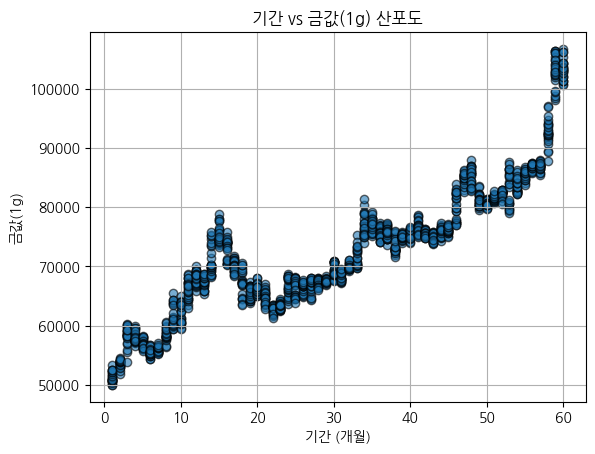

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("최종_cdh.csv", encoding="utf-8-sig")

# 필요한 열 추출
금_분석_데이터 = df[["기간", "금값(1g)"]].copy()

# '기간'을 기준 날짜로부터 경과 개월 수로 변환
기준_날짜 = pd.to_datetime("201905", format="%Y%m")
금_분석_데이터["기간"] = pd.to_datetime(금_분석_데이터["기간"], format="%Y%m")
금_분석_데이터["기간"] = 금_분석_데이터["기간"].map(lambda x: (x.year - 기준_날짜.year) * 12 + (x.month - 기준_날짜.month))
'''
부동산 매매가와 금 값의 날짜 열의 각 날짜를 기준 날짜(2016년 5월)로부터 경과된 전체 개월 수로 변환.
연도 차이를 12개월 단위로 계산하고, 월 차이를 더해 기준으로부터의 개월 수를 구함.
결과적으로, 날짜 데이터를 주성분 분석에 적합한 숫자형 데이터로 변환
'''

# 상관분석 수행
coef_p = 금_분석_데이터.corr(method="pearson")
coef_s = 금_분석_데이터.corr(method="spearman")
coef_k = 금_분석_데이터.corr(method="kendall")

# 상관계수 출력
print("=== 상관분석 결과 ===")
print("피어슨 상관계수:\n", coef_p)
print("\n스피어만 상관계수:\n", coef_s)
print("\n켄달 상관계수:\n", coef_k)

# 산포도 그리기
plt.scatter(금_분석_데이터["기간"], 금_분석_데이터["금값(1g)"], alpha=0.6, edgecolor='k')
plt.title("기간 vs 금값(1g) 산포도")
plt.xlabel("기간 (개월)")
plt.ylabel("금값(1g)")
plt.grid(True)
plt.show()


[cdh6-2] 금 데이터의 기간과 금값(1g)의 상관관계를 분석하는 주성분분석




=== 제1주성분 분석 결과 ===
[-2.65 -2.64 -2.61 ...  3.2   3.22  3.28]

=== 금값 제1주성분 설명력 ===
제1주성분의 설명력: 95.25%

=== 상관분석 결과 ===
피어슨 상관계수:
              기간     제1주성분
기간     1.000000  0.975977
제1주성분  0.975977  1.000000

스피어만 상관계수:
              기간     제1주성분
기간     1.000000  0.983289
제1주성분  0.983289  1.000000

켄달 상관계수:
              기간     제1주성분
기간     1.000000  0.909382
제1주성분  0.909382  1.000000


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


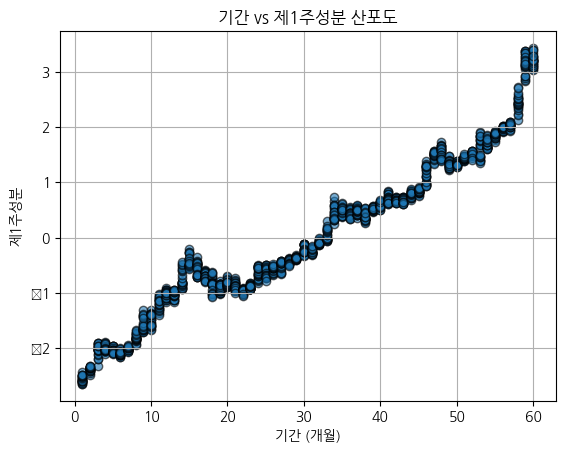

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 데이터 불러오기
df = pd.read_csv("최종_cdh.csv", encoding="utf-8-sig")

# 필요한 열 추출
금_데이터 = df[["기간", "금값(1g)"]].copy()

# NaN 값 제거
금_데이터 = 금_데이터.dropna()

# 기준 날짜 설정 및 '기간' 열 변환
기준_날짜 = pd.to_datetime("201905", format="%Y%m")
금_데이터["기간"] = pd.to_datetime(금_데이터["기간"], format="%Y%m")
금_데이터["기간"] = 금_데이터["기간"].map(lambda x: (x.year - 기준_날짜.year) * 12 + (x.month - 기준_날짜.month))

# 데이터 스케일링
scaler = StandardScaler()
스케일링_데이터 = scaler.fit_transform(금_데이터)

# PCA 실행 (1개의 주성분으로 변환)
pca = PCA(n_components=1)
pca.fit(스케일링_데이터)
제1주성분 = pca.transform(스케일링_데이터)

# PCA 결과 출력
print("\n=== 제1주성분 분석 결과 ===")
print(np.round(제1주성분.flatten(), 2))

# PCA 설명력 출력
설명력 = pca.explained_variance_ratio_
print("\n=== 금값 제1주성분 설명력 ===")
print(f"제1주성분의 설명력: {설명력[0]:.2%}")

# 제1주성분 데이터프레임 생성
금_데이터["제1주성분"] = 제1주성분

# 상관분석 수행 (피어슨, 스피어만, 켄달)
coef_p = 금_데이터[["기간", "제1주성분"]].corr(method="pearson")  # 피어슨
coef_s = 금_데이터[["기간", "제1주성분"]].corr(method="spearman")  # 스피어만
coef_k = 금_데이터[["기간", "제1주성분"]].corr(method="kendall")  # 켄달

# 상관계수 출력
print("\n=== 상관분석 결과 ===")
print("피어슨 상관계수:\n", coef_p)
print("\n스피어만 상관계수:\n", coef_s)
print("\n켄달 상관계수:\n", coef_k)

# 산포도 그리기
plt.scatter(금_데이터["기간"], 금_데이터["제1주성분"], alpha=0.6, edgecolor='k')
plt.title("기간 vs 제1주성분 산포도")
plt.xlabel("기간 (개월)")
plt.ylabel("제1주성분")
plt.grid(True)
plt.show()


[cdh7 부동산 데이터 시계열분석]

<ipython-input-43-321dfe91fdef>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast[-1]


2025년 1월 거래금액(만원): 138125.1003


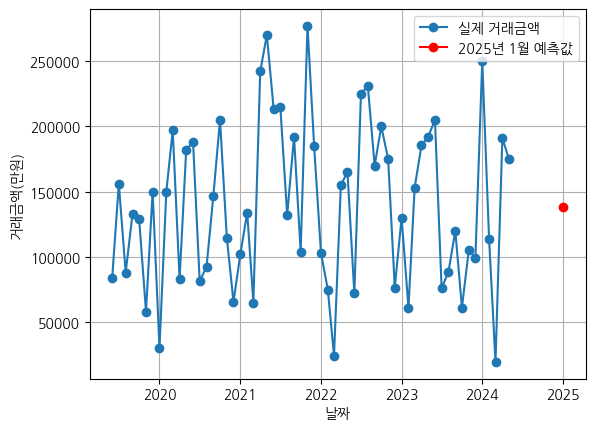

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 1. 데이터 준비
# CSV 파일 읽기
df = pd.read_csv("최종_cdh.csv", encoding="utf-8-sig")

# 필요한 열 추출 및 전처리
data = df[["계약년월", "거래금액(만원)"]].copy()
data["계약년월"] = pd.to_datetime(data["계약년월"], format="%Y%m")
data.set_index("계약년월", inplace=True)

# 중복된 인덱스 제거 (첫 번째 값만 유지)
data = data[~data.index.duplicated(keep="first")]

# 분석 기간 설정 (2019년 6월 ~ 2024년 5월)
data = data["2019-06":"2024-05"]

# 인덱스에 빈도 추가
data = data.asfreq("MS")  # 'MS'는 월의 시작을 의미

# 2. ARIMA 모델 만들기
model = ARIMA(data["거래금액(만원)"], order=(1, 1, 1))

# 3. 모델 학습하기
fitted_model = model.fit()

# 4. 2025년 1월 데이터 예측
forecast = fitted_model.forecast(steps=8)  # 8개월 후 예측 (2025년 1월)
predicted_value = forecast[-1]

# 소수점 4째자리까지만 출력
print("2025년 1월 거래금액(만원):", round(predicted_value, 4))

# 5. 시각화
# 폰트 설정
plt.rc('font', family='NanumGothic')

# 실제 데이터와 예측 데이터 시각화
plt.plot(data.index, data["거래금액(만원)"], label="실제 거래금액", marker='o')
future_dates = pd.date_range(start=data.index[-1], periods=9, freq="MS")[1:]  # 8개월 후까지 생성
plt.plot(future_dates[-1], predicted_value, label="2025년 1월 예측값", marker='o', color='red')
plt.xlabel("날짜")
plt.ylabel("거래금액(만원)")
plt.legend()
plt.grid(True)
plt.show()


[cdh8 금 데이터 시계열분석]

<ipython-input-44-6c880ad4a547>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast[-1]


2025년 1월 금값(1g): 108775.0892


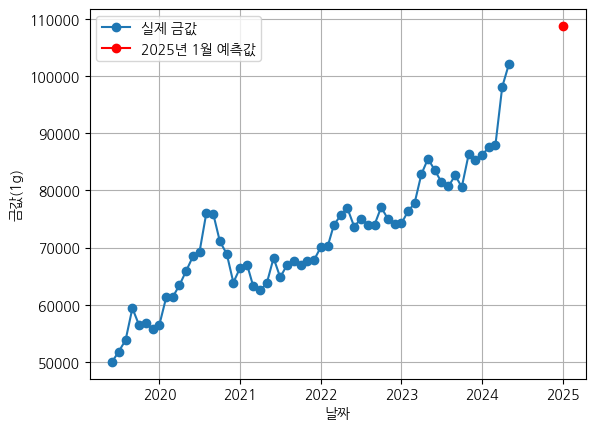

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 1. 데이터 준비
# CSV 파일 읽기
df = pd.read_csv("최종_cdh.csv", encoding="utf-8-sig")

# 필요한 열 추출 및 전처리
data = df[["기간", "금값(1g)"]].copy()
data["기간"] = pd.to_datetime(data["기간"], format="%Y%m")
data.set_index("기간", inplace=True)

# 중복된 인덱스 제거 (첫 번째 값만 유지)
data = data[~data.index.duplicated(keep="first")]

# 분석 기간 설정 (2019년 6월 ~ 2024년 5월)
data = data[(data.index >= "2019-06") & (data.index <= "2024-05")]

# 인덱스에 빈도 추가
data = data.asfreq("MS")  # 'MS'는 월의 시작을 의미

# 2. ARIMA 모델 만들기
model = ARIMA(data["금값(1g)"], order=(1, 1, 1))

# 3. 모델 학습하기
fitted_model = model.fit()

# 4. 2025년 1월 데이터 예측
forecast = fitted_model.forecast(steps=8)  # 8개월 후 예측 (2025년 1월)
predicted_value = forecast[-1]

# 소수점 4째자리까지만 출력
print("2025년 1월 금값(1g):",round(predicted_value, 4))

# 5. 시각화
# 폰트 설정
plt.rc('font', family='NanumGothic')

# 실제 데이터와 예측 데이터 시각화
plt.plot(data.index, data["금값(1g)"], label="실제 금값", marker='o')
future_dates = pd.date_range(start=data.index[-1], periods=9, freq="MS")[1:]  # 8개월 후까지 생성
plt.plot(future_dates[-1], predicted_value, label="2025년 1월 예측값", marker='o', color='red')
plt.xlabel("날짜")
plt.ylabel("금값(1g)")
plt.legend()
plt.grid(True)
plt.show()


[cdh9 송파구 부동산 매매가와 금값의 상관관계]





=== 제1주성분 상관관계 분석 ===
피어슨 상관계수:
            부동산_제1주성분  금값_제1주성분
부동산_제1주성분    1.00000  -0.63468
금값_제1주성분    -0.63468   1.00000

스피어만 상관계수:
            부동산_제1주성분  금값_제1주성분
부동산_제1주성분   1.000000 -0.636954
금값_제1주성분   -0.636954  1.000000

켄달 상관계수:
            부동산_제1주성분  금값_제1주성분
부동산_제1주성분    1.00000  -0.43918
금값_제1주성분    -0.43918   1.00000


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


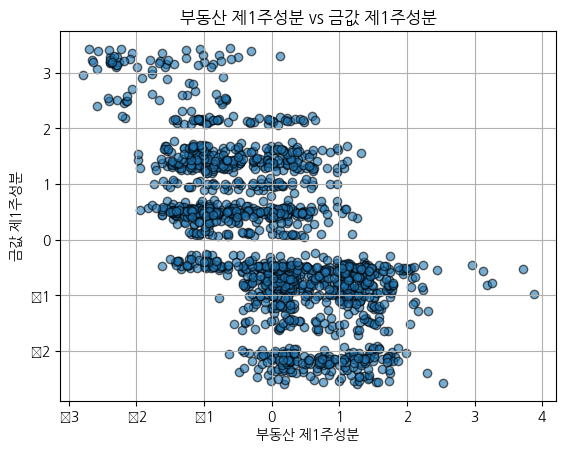

In [46]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. 데이터 읽기
df = pd.read_csv("최종_cdh.csv", encoding="utf-8-sig")

# 필요한 열 추출
df = df[["계약년월", "거래금액(만원)", "기간", "금값(1g)"]].dropna()

# 2. 스케일링 및 PCA 준비
scaler = StandardScaler()

# '부동산' 관련 데이터 (계약년월, 거래금액)
부동산_데이터 = df[["계약년월", "거래금액(만원)"]]
부동산_스케일링 = scaler.fit_transform(부동산_데이터)

# '금값' 관련 데이터 (기간, 금값)
금값_데이터 = df[["기간", "금값(1g)"]]
금값_스케일링 = scaler.fit_transform(금값_데이터)

# PCA 적용
pca = PCA(n_components=1)

# 부동산 제1주성분 추출
부동산_제1주성분 = pca.fit_transform(부동산_스케일링).flatten()

# 금값 제1주성분 추출
금값_제1주성분 = pca.fit_transform(금값_스케일링).flatten()

# 3. 제1주성분 데이터프레임 생성
주성분_df = pd.DataFrame({
    "부동산_제1주성분": 부동산_제1주성분,
    "금값_제1주성분": 금값_제1주성분
})

# 4. 상관관계 분석
pearson_corr = 주성분_df.corr(method="pearson")  # 피어슨 상관계수
spearman_corr = 주성분_df.corr(method="spearman")  # 스피어만 상관계수
kendall_corr = 주성분_df.corr(method="kendall")  # 켄달 상관계수

# 결과 출력
print("\n=== 제1주성분 상관관계 분석 ===")
print("피어슨 상관계수:\n", pearson_corr)
print("\n스피어만 상관계수:\n", spearman_corr)
print("\n켄달 상관계수:\n", kendall_corr)

# 5. 산포도 시각화
plt.scatter(주성분_df["부동산_제1주성분"], 주성분_df["금값_제1주성분"], alpha=0.6, edgecolor="k")
plt.title("부동산 제1주성분 vs 금값 제1주성분")
plt.xlabel("부동산 제1주성분")
plt.ylabel("금값 제1주성분")
plt.grid(True)
plt.show()
